<a href="https://colab.research.google.com/github/BhavyaKohli/Using-facial-features-for-recognition/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install fastai==2.5.5
!pip install watermark

In [1]:
%load_ext watermark

In [2]:
%watermark -v -p numpy,pandas,fastai,torch

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

numpy : 1.21.6
pandas: 1.3.5
fastai: 2.5.5
torch : 1.10.2



In [3]:
import fastai
fastai.__version__

'2.5.5'

In [4]:
from fastai.vision.all import *
import matplotlib.pyplot as plt

print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.__version__)

True
10.2
1.10.2+cu102


In [5]:
import numpy as np
import pandas as pd

In [6]:
DATA_DIR = "/content/drive/Shareddrives/DS 303 Course Project/data/"

lookup = pd.read_csv(DATA_DIR + 'IdLookupTable.csv')
train_df = pd.read_csv(DATA_DIR + 'training.zip')
test_df = pd.read_csv(DATA_DIR + 'test.zip')

train_images_df = train_df['Image']
train_points_df = train_df.drop(columns=['Image'])

In [7]:
train_points_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [8]:
mapping = {i: j for i,j in zip(range(30),train_points_df.columns)}
mapping

{0: 'left_eye_center_x',
 1: 'left_eye_center_y',
 2: 'right_eye_center_x',
 3: 'right_eye_center_y',
 4: 'left_eye_inner_corner_x',
 5: 'left_eye_inner_corner_y',
 6: 'left_eye_outer_corner_x',
 7: 'left_eye_outer_corner_y',
 8: 'right_eye_inner_corner_x',
 9: 'right_eye_inner_corner_y',
 10: 'right_eye_outer_corner_x',
 11: 'right_eye_outer_corner_y',
 12: 'left_eyebrow_inner_end_x',
 13: 'left_eyebrow_inner_end_y',
 14: 'left_eyebrow_outer_end_x',
 15: 'left_eyebrow_outer_end_y',
 16: 'right_eyebrow_inner_end_x',
 17: 'right_eyebrow_inner_end_y',
 18: 'right_eyebrow_outer_end_x',
 19: 'right_eyebrow_outer_end_y',
 20: 'nose_tip_x',
 21: 'nose_tip_y',
 22: 'mouth_left_corner_x',
 23: 'mouth_left_corner_y',
 24: 'mouth_right_corner_x',
 25: 'mouth_right_corner_y',
 26: 'mouth_center_top_lip_x',
 27: 'mouth_center_top_lip_y',
 28: 'mouth_center_bottom_lip_x',
 29: 'mouth_center_bottom_lip_y'}

In [9]:
train_df.dtypes

left_eye_center_x            float64
left_eye_center_y            float64
right_eye_center_x           float64
right_eye_center_y           float64
left_eye_inner_corner_x      float64
left_eye_inner_corner_y      float64
left_eye_outer_corner_x      float64
left_eye_outer_corner_y      float64
right_eye_inner_corner_x     float64
right_eye_inner_corner_y     float64
right_eye_outer_corner_x     float64
right_eye_outer_corner_y     float64
left_eyebrow_inner_end_x     float64
left_eyebrow_inner_end_y     float64
left_eyebrow_outer_end_x     float64
left_eyebrow_outer_end_y     float64
right_eyebrow_inner_end_x    float64
right_eyebrow_inner_end_y    float64
right_eyebrow_outer_end_x    float64
right_eyebrow_outer_end_y    float64
nose_tip_x                   float64
nose_tip_y                   float64
mouth_left_corner_x          float64
mouth_left_corner_y          float64
mouth_right_corner_x         float64
mouth_right_corner_y         float64
mouth_center_top_lip_x       float64
m

In [10]:
import tqdm.notebook as tq

train_images = [np.fromstring(train_images_df.iloc[i], sep=' ').reshape(96,96) for i in tq.trange(train_images_df.size)]
train_points_1d = [train_points_df.iloc[i].values for i in tq.trange(train_points_df.shape[0])]
train_points = [train_points_df.iloc[i].values.reshape(15,2) for i in tq.trange(train_points_df.shape[0])]

  0%|          | 0/7049 [00:00<?, ?it/s]

  0%|          | 0/7049 [00:00<?, ?it/s]

  0%|          | 0/7049 [00:00<?, ?it/s]

(-0.5, 95.5, 95.5, -0.5)

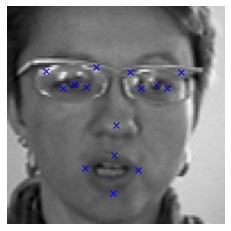

In [11]:
plt.imshow(train_images[10], cmap='gray')
plt.plot(train_points[10][:,0], train_points[10][:,1], 'bx')
plt.axis('off')

In [13]:
def show_image_and_points(img, true_points=None, pred_points=None):
    ax = plt.imshow(img, cmap='gray')
    if true_points is not None:
        plt.plot(true_points[:,0], true_points[:,1], 'bx')
    if pred_points is not None:
        plt.plot(pred_points[:,0], pred_points[:,1], 'bx')
    plt.axis('off')
def show_test(i):
    pred,_,_ = learner.predict(test_images[i])
    show_image_and_points(test_images[i], pred_points=pred)
def show_train(i, learner=None):
    fully_decoded = None
    if learner is not None:
        fully_decoded, loss_func_decoded, probabilities = learner.predict(train_images[i])
    show_image_and_points(train_images[i], true_points=train_points[i], pred_points=fully_decoded)

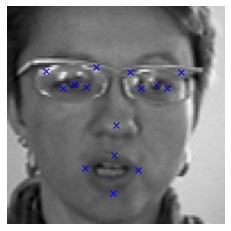

In [14]:
show_train(10)

In [15]:
def augment(img, pnts, rot_deg, zoom_factor, x_shift_pix, y_shift_pix):
    sz = img.shape[-2:]
    def get_rotation(x):
        mysz = x.new_ones(x.shape[0])
        rot_rad = torch.ones_like(mysz)*(rot_deg / 180.0 * np.pi)
        m11 = rot_rad.cos() / zoom_factor
        m12 = rot_rad.sin() / zoom_factor
        t0 = torch.ones_like(mysz)*(x_shift_pix/48.0)
        t1 = torch.ones_like(mysz)*(y_shift_pix/48.0)
        return affine_mat(m11, m12, t0, -m12, m11, t1)
    t1 = AffineCoordTfm(aff_fs=get_rotation, size=sz)
    p1 = Pipeline(funcs=t1)
    x = TensorImage(img).view([1,1,96,96])
    y = TensorPoint(pnts, img_size=[96,96]).view([1,15,2])
    x,y = p1((x,y/48.0-1.0))
    y = y.view([15,2])
    coord_ok = (y[:,0] > -1.0) & (y[:,0] < 1.0) & (y[:,1] > -1.0) & (y[:,1] < 1.0)
    coord_ok = torch.stack([coord_ok, coord_ok], dim=1)
    y = y.where(coord_ok, tensor(np.nan))
    y = y*48.0+48.0
    return np.array(x.view([96,96])), np.array(y)

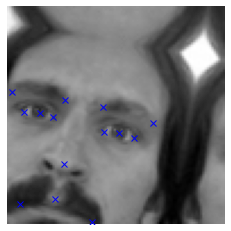

In [17]:
aug_img, aug_pnts = augment(train_images[0], train_points[0], 10.0, 1.0, 16.0, -16.0)
show_image_and_points(aug_img, true_points=aug_pnts)

In [18]:
augs = []
one_pixel = 2.0/96.0
for dx in range(21):
    for dy in range(21):
        if dx==10 and dy==10:
            continue
        augs.append([0.0, 1.0, dx-10.0, dy-10.0])
for rot_deg in range(21):
    if rot_deg==10:
        continue
    augs.append([rot_deg-10, 1.0, 0.0, 0.0])
for scale in range(21):
    if scale==10:
        continue
    augs.append([0.0, 0.9 + 0.01*scale, 0.0, 0.0])
print(len(augs))

480


In [19]:
aug_images = []
aug_points = []
aug_ind = 0
for k1 in tq.trange(len(train_images)):
    img, point = augment(train_images[k1], train_points[k1], *augs[aug_ind])
    aug_images.append(train_images[k1])
    aug_points.append(train_points[k1])
    aug_images.append(img)
    aug_points.append(point)
    aug_ind = (aug_ind + 1) % len(augs)
print(len(aug_images))

  0%|          | 0/7049 [00:00<?, ?it/s]

14098


In [20]:
train_images = aug_images
train_points = aug_points

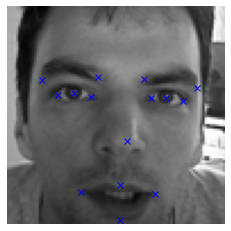

In [24]:
show_train(10)

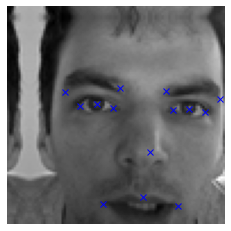

In [27]:
show_train(11)

In [28]:
class MyBaseLoss():
    "Same as my `loss_cls`, but flattens input and target."
    activation=decodes=noops
    def __init__(self, loss_cls, *args, axis=-1, flatten=True, floatify=False, is_2d=True, **kwargs):
        store_attr("axis,flatten,floatify,is_2d")
        self.func = loss_cls(*args,**kwargs)
        functools.update_wrapper(self, self.func)

    def __repr__(self): return f"MyFlattenedLoss of {self.func}"
    @property
    def reduction(self): return self.func.reduction
    @reduction.setter
    def reduction(self, v): self.func.reduction = v

    def _contiguous(self,x):
        return TensorBase(x.transpose(self.axis,-1).contiguous()) if isinstance(x,torch.Tensor) else x

    def __call__(self, inp, targ, **kwargs):
        inp,targ  = map(self._contiguous, (inp,targ))
        if self.floatify and targ.dtype!=torch.float16: targ = targ.float()
        if targ.dtype in [torch.int8, torch.int16, torch.int32]: targ = targ.long()
        if self.flatten: inp = inp.view(-1,inp.shape[-1]) if self.is_2d else inp.view(-1)
        tmptarg2 = targ.view(inp.shape)
        tmptarg3 = torch.where(torch.isnan(tmptarg2), inp, tmptarg2)
        tmptarg4 = tmptarg3.view(-1) if self.flatten else tmptarg3
        return self.func.__call__(inp, tmptarg4, **kwargs)

In [29]:
@use_kwargs_dict(reduction='mean')
def MyMSELossFlat(*args, axis=-1, floatify=True, **kwargs):
    "Same as MY `nn.MSELoss`, but flattens input and target."
    return MyBaseLoss(nn.MSELoss, *args, axis=axis, floatify=floatify, is_2d=False, **kwargs)

In [30]:
def MySplitter(valid_pcts=0.2):
    def _inner(item_range):
        cut = int(len(item_range) * (1.0-valid_pcts))
        mylist = list(item_range)
        l1 = mylist[:cut]
        l2 = mylist[cut:]
        return L(l1), L(l2)
    return _inner

In [31]:
def get_x(ind):
    return train_images[ind]
def get_y(ind):
    return train_points[ind]
def get_items(i): return i
db = DataBlock(blocks=[ImageBlock, PointBlock],
               get_items=get_items,
               get_x=get_x, get_y=get_y,
               item_tfms=Resize([96,96]),
               splitter=MySplitter(0.2),
               batch_tfms=aug_transforms(size=[96,96],
                                         mult=1.0, max_rotate=8.0, 
                                         flip_vert=False, 
                                         do_flip=False, 
                                         pad_mode='border', # 'border' or 'reflection'
                                         max_zoom=1.0, min_zoom=0.9, max_lighting=0.1, max_warp=0.0)
              )

In [32]:
db.summary(range(len(train_images)))

Setting-up type transforms pipelines
Found 14098 items
2 datasets of sizes 11278,2820
Setting up Pipeline: get_x -> PILBase.create
Setting up Pipeline: get_y -> TensorPoint.create

Building one sample
  Pipeline: get_x -> PILBase.create
    starting from
      0
    applying get_x gives
      [[238. 236. 237. ... 250. 250. 250.]
 [235. 238. 236. ... 249. 250. 251.]
 [237. 236. 237. ... 251. 251. 250.]
 ...
 [186. 183. 181. ...  52.  57.  60.]
 [189. 188. 207. ...  61.  69.  78.]
 [191. 184. 184. ...  70.  75.  90.]]
    applying PILBase.create gives
      PILImage mode=F size=96x96
  Pipeline: get_y -> TensorPoint.create
    starting from
      0
    applying get_y gives
      [[66.03356391 39.00227368]
 [30.22700752 36.4216782 ]
 [59.58207519 39.64742256]
 [73.13034586 39.96999699]
 [36.35657143 37.3894015 ]
 [23.45287218 37.3894015 ]
 [56.95326316 29.03364812]
 [80.22712782 32.22813835]
 [40.22760902 29.0023218 ]
 [16.35637895 29.64747068]
 [44.42057143 57.06680301]
 [61.19530827 79.

In [33]:
dls = db.dataloaders(range(len(train_images)), bs=64)
dls.train_ds.loss_func = MyMSELossFlat()

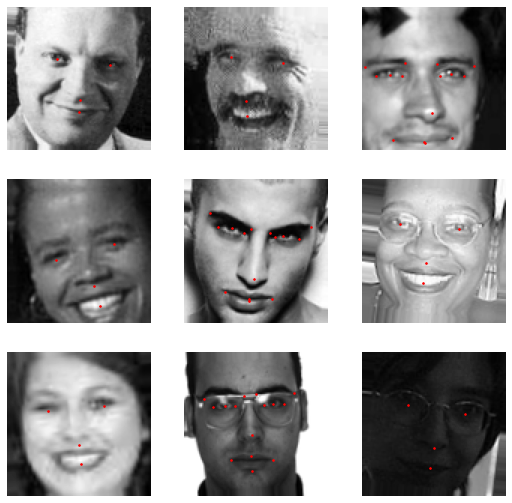

In [34]:
dls.show_batch(cmap='gray', unique=False)

In [35]:
learner = cnn_learner(dls, resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [36]:
learner.summary()

Sequential (Input shape: 64 x 3 x 96 x 96)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 48 x 48   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 24 x 24   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                        

In [37]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

SuggestedLRs(valley=0.005248074419796467)

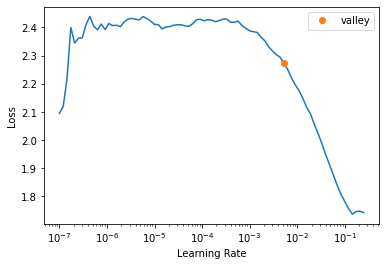

In [38]:
learner.lr_find()

In [39]:
print('Starting fit one cycle')
learner.fit_one_cycle(15, lr_max=5e-3)

Starting fit one cycle


epoch,train_loss,valid_loss,time
0,1.123374,0.091863,00:28
1,0.162782,0.017949,00:33
2,0.043894,0.033324,00:28
3,0.063363,0.022549,00:29
4,0.043744,0.038912,00:28
5,0.032669,0.029596,00:29
6,0.019248,0.011153,00:29
7,0.010580,0.003666,00:29
8,0.007591,0.002377,00:28
9,0.005908,0.004217,00:28


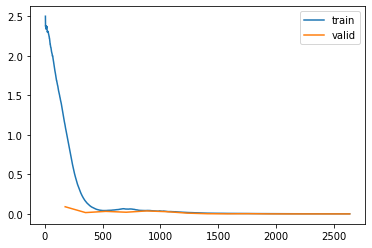

In [40]:
learner.recorder.plot_loss()

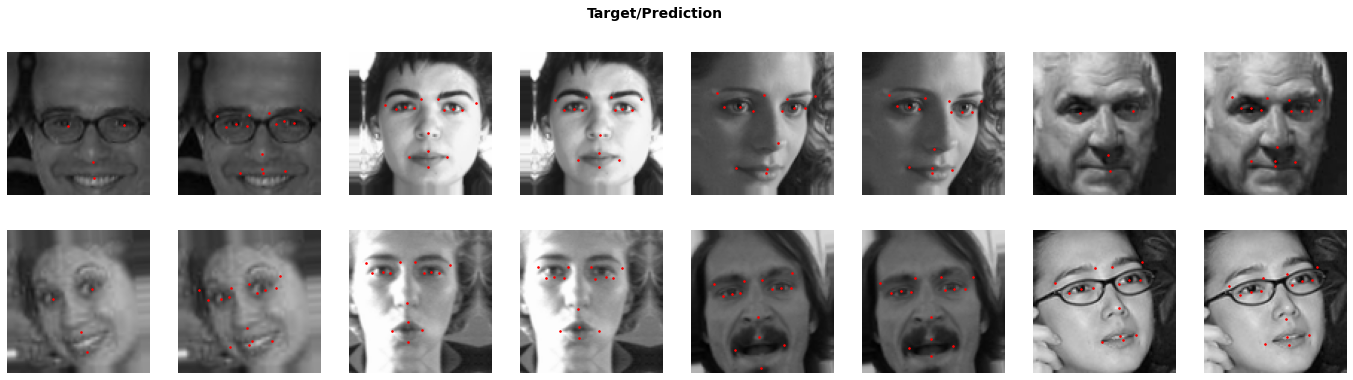

In [43]:
learner.show_results(ds_idx=0, shuffle=True, nrows=2, ncols=4)

In [ ]:
learner.fine_tune(75)

epoch,train_loss,valid_loss,time
